# Progetto d'esame per il corso di Machine Learning

Stud. Marzio Della Bosca

mat. 329608

# Preprocessing
Feature tolte:
- koi_vet_stat:   Stato di valutazione
- koi_vet_date:   Data ultimo aggiornamento
- koi_pdisposition: Categoria dell'oggetto KOI secondo le rilevazioni Kepler
- koi_score:      Valore di confidenza della categorizzazione del KOI
- koi_fpflag_nt:  Flag di falso positivo di transiti
- koi_fpflag_ss:  Flag di falso positivo per eclissi stellari
- koi_fpflag_co:  Flag di falso positivo dovuto a problemi di offset relativi alla posizione del telescopio
- koi_fpflag_ec:  Flag di falso positivo dovuto al fatto che l'oggetto abbia lo stesso periodo ed epoca di un altro
- koi_disp_prov:  Provenienza dei dati ai fini della categorizzazione
- koi_comment:    Commenti
- koi_time0bk:    Si riferisce al momento del primo transito rilevato [BKJD]
- koi_time0:      Si riferisce al momento del primo transito rilevato [BJD]
- koi_longp:      Longitudine di Periastron [deg]
- koi_ingress:    Il tempo tra il primo e il secondo contatto del transito planetario [hrs]
- koi_srho:       Densità stellare [g/cm**3]
- koi_fittype:    Tipo di FIT dei parametri planetari
- koi_incl:       Inclinazione tra il piano del cielo e il piano dell'orbita dell'oggetto [deg]
- koi_limbdark_mod: Un riferimento al modello di oscuramento del limbo utilizzato per calcolare i coefficienti di oscuramento del limbo stellare.
- koi_ldm_coeff4: Coefficiente 4 di oscuramento del limbo stellare
- koi_ldm_coeff3: Coefficiente 3 di oscuramento del limbo stellare
- koi_ldm_coeff2: Coefficiente 2 di oscuramento del limbo stellare
- koi_ldm_coeff1: Coefficiente 1 di oscuramento del limbo stellare
- koi_parm_prov:  Provenienza parametri.
- koi_max_sngle_ev: Massimo singolo evento statistico
- koi_max_mult_ev: Massimo multiplo evento statistico
- koi_model_snr:  Valore di transito normalizzato
- koi_tce_plnt_num: Numero pianeta TCE
- koi_tce_delivname: Nome pianeta TCE
- koi_quarters:   Una stringa di bit che indica in quali trimestri dei dati di Kepler sono stati cercati segni di transito
- koi_bin_oedp_sig: Statistica di comparazione di profondità pari - dispari
- koi_trans_mod:  Modello di transito
- koi_model_dof:  Gradi di libertà
- koi_model_chisq: Chi-Quadro
- koi_datalink_dvr: Questa è il percorso relativo per il rapporto di convalida dei dati
- koi_datalink_dvs: Questo è il percorso relativo per il riepilogo della convalida dei dati
- koi_sparprov: Provenienza dei parametri stellari
- ra: Ascenzione destra [gradi-decimali]
- dec: Declinazione [gradi-decimali]
- koi_kepmag: Banda di Kepler [mag]
- koi_gmag: banda 'g' [mag]
- koi_rmag: banda 'r' [mag]
- koi_imag: banda 'i' [mag]
- koi_zmag: banda 'z' [mag]
- koi_jmag: banda 'J' [mag]
- koi_hmag: banda 'H' [mag]
- koi_kmag: banda 'K' [mag]
- koi_fwm_stat_sig: Importanza dell'errore di calcolo della posizione oggetto dovuta all'offset [percentual]
- koi_fwm_sra:    Parametro 1 errore offset
- koi_fwm_sdec:   Parametro 2 errore offset
- koi_fwm_srao:   Parametro 3 errore offset
- koi_fwm_sdeco:  Parametro 4 errore offset
- koi_fwm_prao:   Parametro 5 errore offset
- koi_fwm_pdeco:  Parametro 6 errore offset
- koi_dicco_mra:  Parametro 7 errore offset
- koi_dicco_mdec: Parametro 8 errore offset
- koi_dicco_msky: Parametro 9 errore offset
- koi_dikco_mra:  Parametro 10 errore offset
- koi_dikco_mdec: Parametro 11 errore offset
- koi_dikco_msky: Parametro 12 errore offset

In [115]:
# Gestione dataset, dataframe, matrici, grafici, ecc.
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder

scaler = StandardScaler()

# Definisco una funzione per il confronto delle metriche di valutazione tra i modelli
def evaluations(y_pred_1, y_pred_2, y_test_1, y_test_2, model_1, model_2, seed, test_size):
    
    accuracy_1 = accuracy_score(y_test_1, y_pred_1)
    accuracy_2 = accuracy_score(y_test_2, y_pred_2)

    precision_1 = precision_score(y_test_1, y_pred_1)
    precision_2 = precision_score(y_test_2, y_pred_2)

    recall_1 = recall_score(y_test_1, y_pred_1)
    recall_2 = recall_score(y_test_2, y_pred_2)

    f1_1 = f1_score(y_test_1, y_pred_1)
    f1_2 = f1_score(y_test_2, y_pred_2)

    print("Metriche set di test: seed "+f"{str(seed)} e set di test {str(test_size)}"+ r"% del "+"totale")

    print("\nAccuracy:")
    print(f"{model_1}: {accuracy_1}")
    print(f"{model_2}: {accuracy_2}")

    print("\nPrecision:")
    print(f"{model_1}: {precision_1}")
    print(f"{model_2}: {precision_2}")

    print("\nRecall:")
    print(f"{model_1}: {recall_1}")
    print(f"{model_2}: {recall_2}")

    print("\nF1:")
    print(f"{model_1}: {f1_1}")
    print(f"{model_2}: {f1_2}")

    # Calcolo le matrici di confusione per il modello 21 e 22
    print("\nMatrice di confusione per svm_21:")
    mat_1 = confusion_matrix(y_test_1, y_pred_1)
    sns.heatmap(mat_1.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()  
    print(classification_report(y_test_1, y_pred_1))

    print("\nMatrice di confusione per svm_22:")
    mat_2 = confusion_matrix(y_test_2, y_pred_2)
    sns.heatmap(mat_2.T, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.show()
    print(classification_report(y_test_2, y_pred_2))

    return [accuracy_1, precision_1, recall_1, f1_1], [accuracy_2, precision_2, recall_2, f1_2]

# Definisco una funzione per il settaggio del seed
def set_seed(i):
    seed = 0
    if i == 0:
        seed = 8
    elif i == 1:
        seed = 15
    elif i == 2:
        seed = 23
    elif i == 3:
        seed = 31
    elif i == 4:
        seed = 42  
    return seed

# Addestra il modello utilizzando i dati di addestramento con seed diversi e restituisce le medie delle metriche di valutazione
def training(model_21, model_22, X_koi_data, y_koi_data, X_koi_data_sg_t, y_koi_data_sg_t, model_1, model_2, ctrl_scale):
    eva_1 = [0,0,0,0]
    eva_2 = [0,0,0,0]
    for i in range(0, 5):
        seed = set_seed(i)
        X_train_kD, X_test_kD, y_train_kD, y_test_kD = train_test_split(X_koi_data, y_koi_data, test_size=0.2, random_state=seed)
        X_train_cKd, X_test_cKd, y_train_cKd, y_test_cKd = train_test_split(X_koi_data_sg_t, y_koi_data_sg_t, test_size=0.2, random_state=seed)
       
        if ctrl_scale == 1:
            X_train_kD = scaler.fit_transform(X_train_kD)
            X_test_kD = scaler.transform(X_test_kD)
            X_train_cKd = scaler.fit_transform(X_train_cKd)
            X_test_cKd = scaler.transform(X_test_cKd)
        model_21.fit(X_train_kD, y_train_kD)  # X_train sono le feature, y_train è il target
        model_22.fit(X_train_cKd, y_train_cKd)
        eva_SDG_21_1, eva_SDG_22_1 = evaluations(model_21.predict(X_test_kD), model_22.predict(X_test_cKd), y_test_kD, y_test_cKd, model_1, model_2, seed, 20)
        eva_1 = np.add(eva_1, eva_SDG_21_1)
        eva_2 = np.add(eva_2, eva_SDG_22_1)
    return eva_1/5, eva_2/5

# Definisco una funzione per la stampa delle metriche di valutazione
def plotter(models, labels):
    # Crea una lista di metriche
    metrics = ['accuracy', 'precision', 'f1', 'recall']

    # Crea una lista di colori
    colors = ['red', 'green', 'blue', 'purple']

    # Crea il grafico
    for i, metric in enumerate(metrics):
        plt.plot([model[i] for model in models], color=colors[i], label=metric)

    max_value = max(max(model) for model in models)
    min_value = min(min(model) for model in models)

    # Imposta i limiti dell'asse y
    plt.ylim(min_value - 0.1, max_value + 0.1)

    # Mostra la legenda
    plt.legend()

    # Imposta le etichette dell'asse x
    _ = plt.xticks(range(len(labels)), labels)

In [116]:
# Metodo per la lettura del file CSV attraverso il percorso relativo
koi_data_path = os.getcwd() + r"\dataSetSenzaEtaPro.csv"               # r"stringa" fa considerare stringa raw, evita warning '\d' e '\s'
koi_solar_data_path = os.getcwd() + r"\solarAge.csv"
koi_data = pd.read_csv(koi_data_path)
koi_solar_data = pd.read_csv(koi_solar_data_path)


print(f"\nNumero di feature data senza età: {str(koi_data.shape[1])}, numero di istanze: {str(koi_data.shape[0])}")
print(f"Numero di feature data con età: {str(koi_solar_data.shape[1])}, numero di istanze: {str(koi_solar_data.shape[0])}")

#################################################################################################################################################

# Elimino i parametri che non hanno informazioni (NaN, o stringhe vuote) per più del 70% degli elementi, impostando il threshold
threshold = len(koi_data) * 0.3  # Imposto il threshold al 30% del numero di istanze
cleaned_koi_data = koi_data.dropna(axis=1, thresh=threshold)
dropped_features = set(koi_data.columns) - set(cleaned_koi_data.columns)
print(f"Feature droppate: {list(dropped_features)}, numero di feature: {str(cleaned_koi_data.shape[1])}")

# Elimino gli elementi che hanno stringhe vuote o valori nulli per quei parametri che hanno informazioni per più del 90% degli elementi
koi_data = cleaned_koi_data.dropna(axis=0, how='any')
print(f"Nuovo numero di istanze: {str(koi_data.shape[0])}")


Numero di feature data senza età: 24, numero di istanze: 9564
Numero di feature data con età: 3, numero di istanze: 3865
Feature droppate: ['kepler_name', 'koi_sage'], numero di feature: 22
Nuovo numero di istanze: 8305


In [117]:
# Creazione del nuovo DataFrame per il nuovo file CSV con le distanze dalla Terra
# Rinomina la colonna 'koi_sage' in koi_solar_data in 'koi_sage_solar'
koi_solar_data = koi_solar_data.rename(columns={'koi_sage': 'koi_sage_solar'})

# Unisci i due dataframe in base alla colonna 'kepid'
koi_data_with_Sage = pd.merge(koi_data, koi_solar_data[['kepid', 'koi_sage_solar']], on='kepid')

# Mantengo le istanze con il parametro di riferimento all'età della stella diverso da 0 e null
koi_data_with_Sage['koi_sage_solar'] = koi_data_with_Sage['koi_sage_solar'].replace(0, np.nan)
koi_data_with_Sage = koi_data_with_Sage.dropna(subset=['koi_sage_solar'])

print(f"Numero di istanze dopo il drop di elementi contenente valori nulli: {str(koi_data_with_Sage.shape[0])}")

# Elimino le istanze in cui non si ha conferma della natura del KOI
koi_data = koi_data[koi_data['koi_disposition'] != "CANDIDATE"]
print(f"Numero istanze con classe confermata (senza età): {str(koi_data.shape[0])}")

koi_data_with_Sage = koi_data_with_Sage[koi_data_with_Sage['koi_disposition'] != "CANDIDATE"]
print(f"Numero istanze con classe confermata (con età): {str(koi_data_with_Sage.shape[0])}")

n_instanze_no_age = koi_data.shape[0]
n_instanze_with_age = koi_data_with_Sage.shape[0]

# Elimino i duplicati in base a kepid
koi_data_with_Sage = koi_data_with_Sage.drop_duplicates(subset='kepid', keep='first')
koi_data = koi_data.drop_duplicates(subset='kepid', keep='first')

print("Numero di istanze duplicate eliminate da Dataframe senza età stellare: "+str(n_instanze_no_age - koi_data.shape[0]))
print("Numero di istanze duplicate eliminate da Dataframe con età stellare: "+str(n_instanze_with_age - koi_data_with_Sage.shape[0]))

koi_data_with_Sage = koi_data_with_Sage.drop_duplicates(subset=koi_data_with_Sage.columns[1:], keep='first')
print(f"Numero di istanze dopo il drop di elementi duplicati: \nDataframe senza età stellare: {str(koi_data.shape[0])}\nDataframe con età stellare: {str(koi_data_with_Sage.shape[0])}")

print(koi_data_with_Sage['koi_disposition'].values)

Numero di istanze dopo il drop di elementi contenente valori nulli: 5507
Numero istanze con classe confermata (senza età): 6808
Numero istanze con classe confermata (con età): 4981
Numero di istanze duplicate eliminate da Dataframe senza età stellare: 857
Numero di istanze duplicate eliminate da Dataframe con età stellare: 2645
Numero di istanze dopo il drop di elementi duplicati: 
Dataframe senza età stellare: 5951
Dataframe con età stellare: 2336
['CONFIRMED' 'FALSE POSITIVE' 'CONFIRMED' ... 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE']


### Codifica delle etichette

La colonna koi_disposition è una variabile categorica. Per addestrare un classificatore SVM, è necessario codificare le etichette in valori numerici. 

E' possibile farlo utilizzando la codifica one-hot (1 per "CONFIRMED" e 0 per "FALSE POSITIVE").

In [118]:
# Codifica delle etichette in valori numerici (0 per "FALSE POSITIVE" e 1 per "CONFIRMED")
# Data la natura del if-else fare attenzione a non eseguire il codice più di una volta, o tutti i valori saranno 0
koi_data['koi_disposition'] = koi_data['koi_disposition'].apply(lambda x: 1 if x == "CONFIRMED" else 0)
koi_data_with_Sage['koi_disposition'] = koi_data_with_Sage['koi_disposition'].apply(lambda x: 1 if x == "CONFIRMED" else 0)

print(f"Dataframe senza età stellare. \nNumero istanze confermate in quanto pianeti: {koi_data['koi_disposition'].sum()}\nNumero istanze non confermate in quanto non pianeti: {len(koi_data) - koi_data['koi_disposition'].sum()}")
print(f"\nDataframe con età stellare. \nNumero istanze confermate in quanto pianeti: {koi_data_with_Sage['koi_disposition'].sum()}\nNumero istanze non confermate in quanto non pianeti: {len(koi_data_with_Sage) - koi_data_with_Sage['koi_disposition'].sum()}")

# Elimino le colonne 'kepid' e 'rowid' che non sono utili per la classificazione
koi_data_t = koi_data.drop(columns=['kepid', 'rowid', 'kepoi_name'])
koi_data_sg_t = koi_data_with_Sage.drop(columns=['kepid', 'rowid', 'kepoi_name'])


print(koi_data_with_Sage['koi_disposition'].values)
print(koi_data['koi_disposition'].values) 

Dataframe senza età stellare. 
Numero istanze confermate in quanto pianeti: 1959
Numero istanze non confermate in quanto non pianeti: 3992

Dataframe con età stellare. 
Numero istanze confermate in quanto pianeti: 1520
Numero istanze non confermate in quanto non pianeti: 816
[1 0 1 ... 0 1 0]
[1 0 1 ... 0 0 0]


### Divisione dei dati e addestramento

In [119]:
# Specifica le feature (X) e il target (y)

X_koi_data = koi_data_t.drop(columns=['koi_disposition'])  # Rimuove la colonna di target
y_koi_data = koi_data_t['koi_disposition']

X_koi_data_sg_t = koi_data_sg_t.drop(columns=['koi_disposition'])  
y_koi_data_sg_t = koi_data_sg_t['koi_disposition']

# Divide i dati in set di addestramento e set di test (80% di addestramento, 20% di test)
# X_train contiene le feature di addestramento, y_train contiene le etichette di addestramento,
# X_test contiene le feature di test e y_test contiene le etichette di test.

X_train_kD, X_test_kD, y_train_kD, y_test_kD = train_test_split(X_koi_data, y_koi_data, test_size=0.2, random_state=42)
X_train_cKd, X_test_cKd, y_train_cKd, y_test_cKd = train_test_split(X_koi_data_sg_t, y_koi_data_sg_t, test_size=0.2, random_state=42)

In [29]:
# Crea un modello SVM
svm_model21 = SVC(kernel='linear')  
svm_model22 = SVC(kernel='linear')

# Addestra il modello utilizzando il set di addestramento
svm_model21.fit(X_train_kD, y_train_kD)  # X_train sono le feature, y_train è il target
svm_model22.fit(X_train_cKd, y_train_cKd)

SVC(kernel='linear')

### Valutazione modello

Metriche set di test: seed 42 e set di test 20% del totale

Accuracy:
svm_model_21: 0.8463476070528967
svm_model_22: 0.844017094017094

Precision:
svm_model_21: 0.7757437070938215
svm_model_22: 0.8580645161290322

Recall:
svm_model_21: 0.7995283018867925
svm_model_22: 0.9016949152542373

F1:
svm_model_21: 0.7874564459930313
svm_model_22: 0.8793388429752067

Matrice di confusione per svm_21:


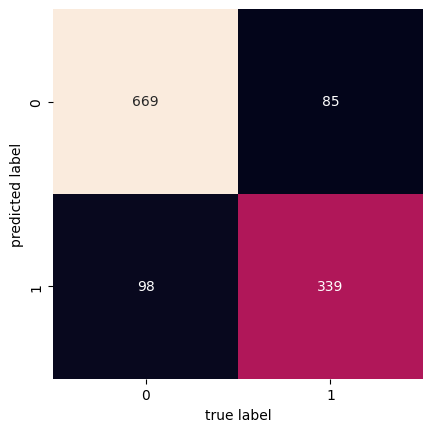

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       767
           1       0.78      0.80      0.79       424

    accuracy                           0.85      1191
   macro avg       0.83      0.84      0.83      1191
weighted avg       0.85      0.85      0.85      1191


Matrice di confusione per svm_22:


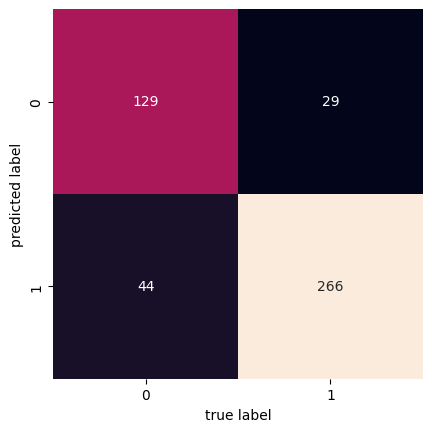

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       173
           1       0.86      0.90      0.88       295

    accuracy                           0.84       468
   macro avg       0.84      0.82      0.83       468
weighted avg       0.84      0.84      0.84       468



In [37]:
eva_svc, eva_svc = evaluations(svm_model21.predict(X_test_kD), svm_model22.predict(X_test_cKd), y_test_kD, y_test_cKd, "svm_model_21", "svm_model_22", 42, 20)

Metriche set di test: seed 8 e set di test 20% del totale

Accuracy:
clf_model_21_1: 0.7036104114189756
clf_model_22_1: 0.7692307692307693

Precision:
clf_model_21_1: 0.562015503875969
clf_model_22_1: 0.781437125748503

Recall:
clf_model_21_1: 0.37662337662337664
clf_model_22_1: 0.8817567567567568

F1:
clf_model_21_1: 0.45101088646967347
clf_model_22_1: 0.8285714285714286

Matrice di confusione per svm_21:


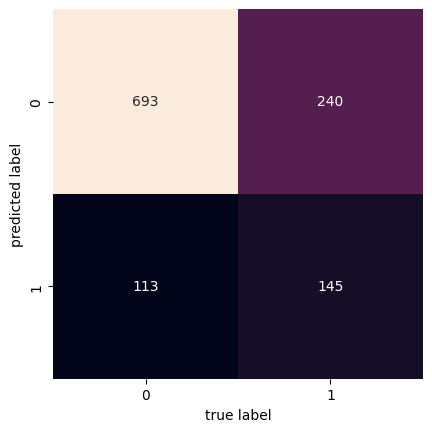

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       806
           1       0.56      0.38      0.45       385

    accuracy                           0.70      1191
   macro avg       0.65      0.62      0.62      1191
weighted avg       0.68      0.70      0.69      1191


Matrice di confusione per svm_22:


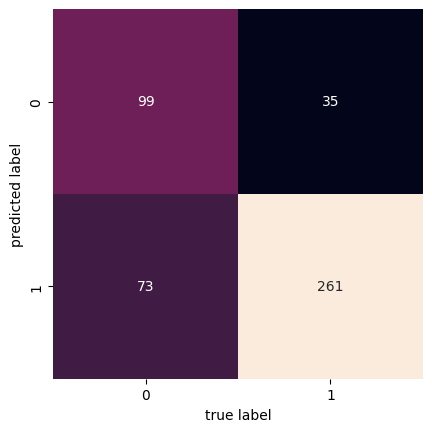

              precision    recall  f1-score   support

           0       0.74      0.58      0.65       172
           1       0.78      0.88      0.83       296

    accuracy                           0.77       468
   macro avg       0.76      0.73      0.74       468
weighted avg       0.77      0.77      0.76       468

Metriche set di test: seed 15 e set di test 20% del totale

Accuracy:
clf_model_21_1: 0.7942905121746432
clf_model_22_1: 0.7094017094017094

Precision:
clf_model_21_1: 0.6774193548387096
clf_model_22_1: 0.709832134292566

Recall:
clf_model_21_1: 0.7036082474226805
clf_model_22_1: 0.9517684887459807

F1:
clf_model_21_1: 0.6902654867256638
clf_model_22_1: 0.8131868131868132

Matrice di confusione per svm_21:


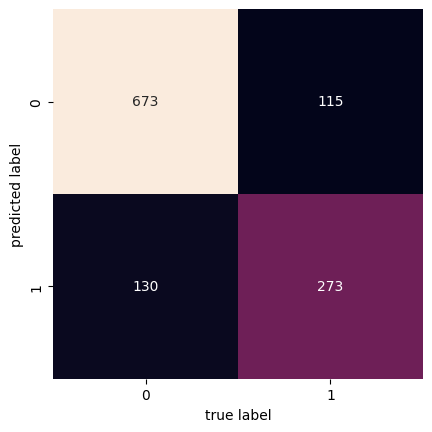

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       803
           1       0.68      0.70      0.69       388

    accuracy                           0.79      1191
   macro avg       0.77      0.77      0.77      1191
weighted avg       0.80      0.79      0.80      1191


Matrice di confusione per svm_22:


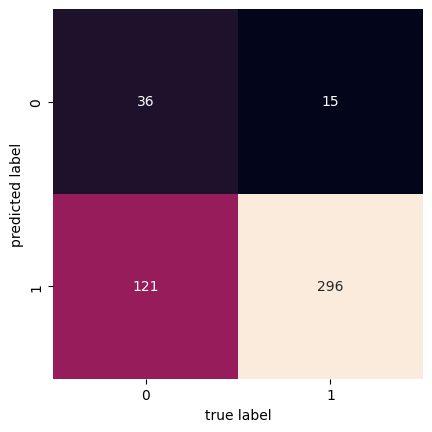

              precision    recall  f1-score   support

           0       0.71      0.23      0.35       157
           1       0.71      0.95      0.81       311

    accuracy                           0.71       468
   macro avg       0.71      0.59      0.58       468
weighted avg       0.71      0.71      0.66       468

Metriche set di test: seed 23 e set di test 20% del totale

Accuracy:
clf_model_21_1: 0.7346767422334173
clf_model_22_1: 0.7457264957264957

Precision:
clf_model_21_1: 0.6023054755043228
clf_model_22_1: 0.7493112947658402

Recall:
clf_model_21_1: 0.5400516795865633
clf_model_22_1: 0.9066666666666666

F1:
clf_model_21_1: 0.569482288828338
clf_model_22_1: 0.8205128205128204

Matrice di confusione per svm_21:


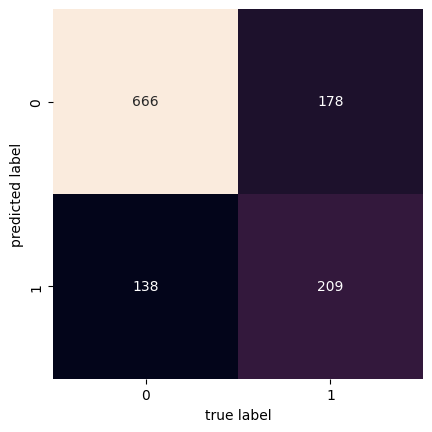

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       804
           1       0.60      0.54      0.57       387

    accuracy                           0.73      1191
   macro avg       0.70      0.68      0.69      1191
weighted avg       0.73      0.73      0.73      1191


Matrice di confusione per svm_22:


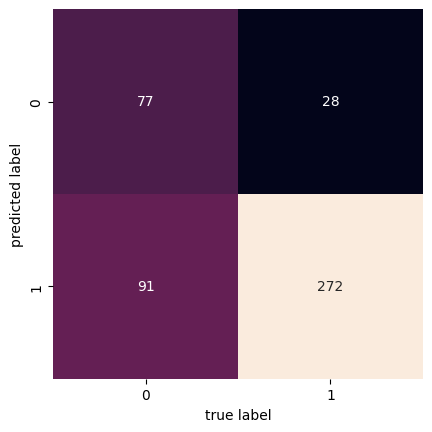

              precision    recall  f1-score   support

           0       0.73      0.46      0.56       168
           1       0.75      0.91      0.82       300

    accuracy                           0.75       468
   macro avg       0.74      0.68      0.69       468
weighted avg       0.74      0.75      0.73       468

Metriche set di test: seed 31 e set di test 20% del totale

Accuracy:
clf_model_21_1: 0.7791771620486986
clf_model_22_1: 0.7457264957264957

Precision:
clf_model_21_1: 0.6923076923076923
clf_model_22_1: 0.7246753246753247

Recall:
clf_model_21_1: 0.5798969072164949
clf_model_22_1: 0.9554794520547946

F1:
clf_model_21_1: 0.6311360448807855
clf_model_22_1: 0.8242245199409158

Matrice di confusione per svm_21:


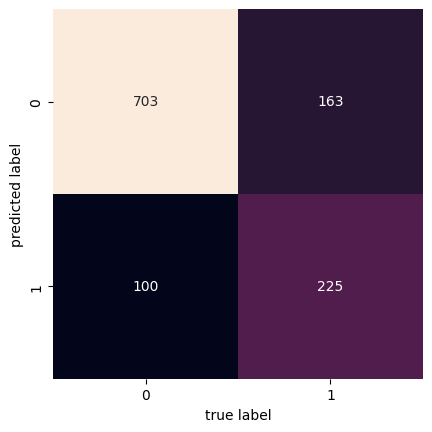

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       803
           1       0.69      0.58      0.63       388

    accuracy                           0.78      1191
   macro avg       0.75      0.73      0.74      1191
weighted avg       0.77      0.78      0.77      1191


Matrice di confusione per svm_22:


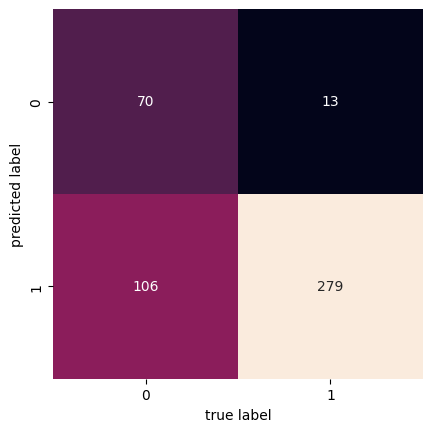

              precision    recall  f1-score   support

           0       0.84      0.40      0.54       176
           1       0.72      0.96      0.82       292

    accuracy                           0.75       468
   macro avg       0.78      0.68      0.68       468
weighted avg       0.77      0.75      0.72       468

Metriche set di test: seed 42 e set di test 20% del totale

Accuracy:
clf_model_21_1: 0.707808564231738
clf_model_22_1: 0.7393162393162394

Precision:
clf_model_21_1: 0.5748031496062992
clf_model_22_1: 0.7464387464387464

Recall:
clf_model_21_1: 0.6886792452830188
clf_model_22_1: 0.888135593220339

F1:
clf_model_21_1: 0.6266094420600858
clf_model_22_1: 0.8111455108359132

Matrice di confusione per svm_21:


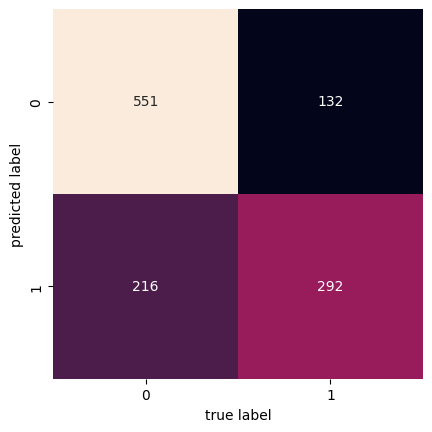

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       767
           1       0.57      0.69      0.63       424

    accuracy                           0.71      1191
   macro avg       0.69      0.70      0.69      1191
weighted avg       0.72      0.71      0.71      1191


Matrice di confusione per svm_22:


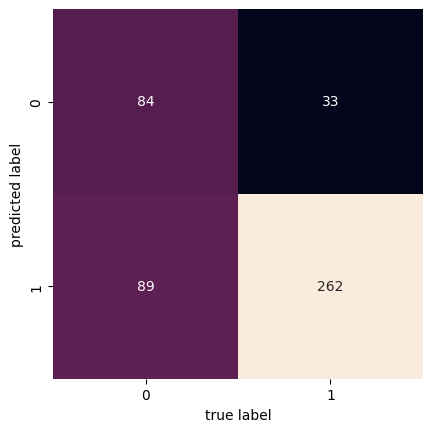

              precision    recall  f1-score   support

           0       0.72      0.49      0.58       173
           1       0.75      0.89      0.81       295

    accuracy                           0.74       468
   macro avg       0.73      0.69      0.70       468
weighted avg       0.74      0.74      0.73       468



In [120]:
# Crea l'oggetto SGDClassifier con la funzione di perdita 'hinge'
clf_model_21_1 = SGDClassifier(loss='hinge')
clf_model_22_1 = SGDClassifier(loss='hinge')

eva_SDG_21_1, eva_SDG_22_1 = training(clf_model_21_1, clf_model_22_1, X_koi_data, y_koi_data, X_koi_data_sg_t, y_koi_data_sg_t, "clf_model_21_1", "clf_model_22_1", 0) 

Introduco la normalizzazione dei dati in modo da evitare "scompensi" forzando le feature ad essere degli stessi ordini di grandezza degli altri.

Metriche set di test: seed 8 e set di test 20% del totale

Accuracy:
clf_model_21_2: 0.8471872376154492
clf_model_22_2: 0.8397435897435898

Precision:
clf_model_21_2: 0.8103975535168195
clf_model_22_2: 0.8338368580060423

Recall:
clf_model_21_2: 0.6883116883116883
clf_model_22_2: 0.9324324324324325

F1:
clf_model_21_2: 0.7443820224719101
clf_model_22_2: 0.8803827751196172

Matrice di confusione per svm_21:


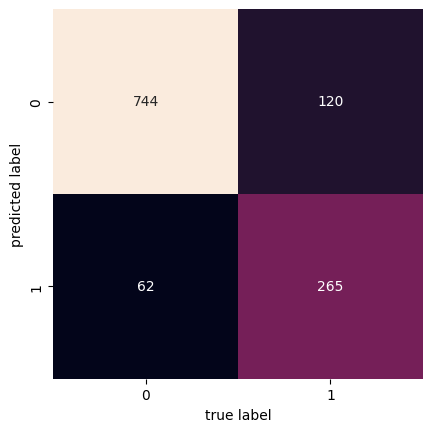

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       806
           1       0.81      0.69      0.74       385

    accuracy                           0.85      1191
   macro avg       0.84      0.81      0.82      1191
weighted avg       0.84      0.85      0.84      1191


Matrice di confusione per svm_22:


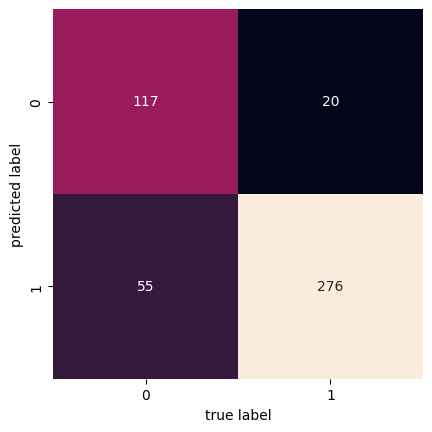

              precision    recall  f1-score   support

           0       0.85      0.68      0.76       172
           1       0.83      0.93      0.88       296

    accuracy                           0.84       468
   macro avg       0.84      0.81      0.82       468
weighted avg       0.84      0.84      0.84       468

Metriche set di test: seed 15 e set di test 20% del totale

Accuracy:
clf_model_21_2: 0.869857262804366
clf_model_22_2: 0.7905982905982906

Precision:
clf_model_21_2: 0.8227146814404432
clf_model_22_2: 0.7983193277310925

Recall:
clf_model_21_2: 0.7654639175257731
clf_model_22_2: 0.9163987138263665

F1:
clf_model_21_2: 0.7930574098798399
clf_model_22_2: 0.8532934131736526

Matrice di confusione per svm_21:


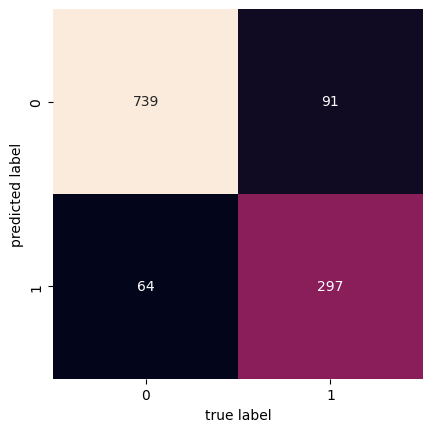

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       803
           1       0.82      0.77      0.79       388

    accuracy                           0.87      1191
   macro avg       0.86      0.84      0.85      1191
weighted avg       0.87      0.87      0.87      1191


Matrice di confusione per svm_22:


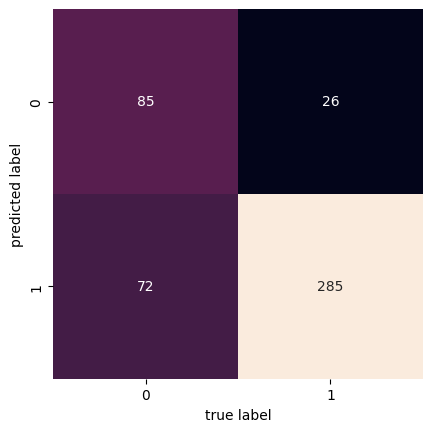

              precision    recall  f1-score   support

           0       0.77      0.54      0.63       157
           1       0.80      0.92      0.85       311

    accuracy                           0.79       468
   macro avg       0.78      0.73      0.74       468
weighted avg       0.79      0.79      0.78       468

Metriche set di test: seed 23 e set di test 20% del totale

Accuracy:
clf_model_21_2: 0.8858102434928632
clf_model_22_2: 0.8311965811965812

Precision:
clf_model_21_2: 0.8161209068010076
clf_model_22_2: 0.84

Recall:
clf_model_21_2: 0.8372093023255814
clf_model_22_2: 0.91

F1:
clf_model_21_2: 0.826530612244898
clf_model_22_2: 0.8735999999999999

Matrice di confusione per svm_21:


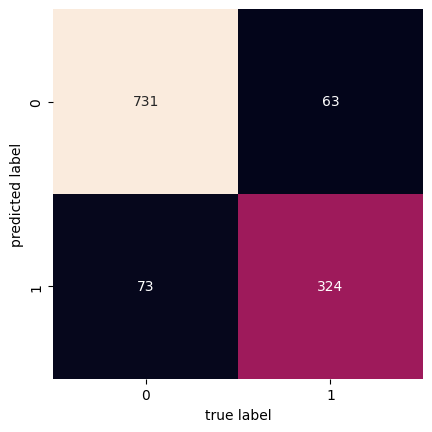

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       804
           1       0.82      0.84      0.83       387

    accuracy                           0.89      1191
   macro avg       0.87      0.87      0.87      1191
weighted avg       0.89      0.89      0.89      1191


Matrice di confusione per svm_22:


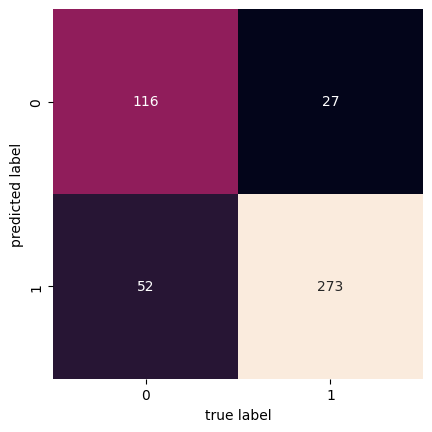

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       168
           1       0.84      0.91      0.87       300

    accuracy                           0.83       468
   macro avg       0.83      0.80      0.81       468
weighted avg       0.83      0.83      0.83       468

Metriche set di test: seed 31 e set di test 20% del totale

Accuracy:
clf_model_21_2: 0.8740554156171285
clf_model_22_2: 0.8290598290598291

Precision:
clf_model_21_2: 0.8269230769230769
clf_model_22_2: 0.8081395348837209

Recall:
clf_model_21_2: 0.7757731958762887
clf_model_22_2: 0.952054794520548

F1:
clf_model_21_2: 0.8005319148936169
clf_model_22_2: 0.8742138364779874

Matrice di confusione per svm_21:


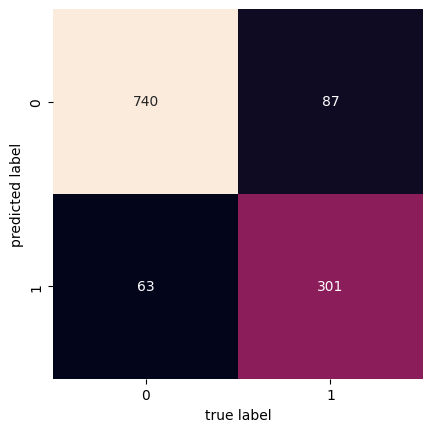

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       803
           1       0.83      0.78      0.80       388

    accuracy                           0.87      1191
   macro avg       0.86      0.85      0.85      1191
weighted avg       0.87      0.87      0.87      1191


Matrice di confusione per svm_22:


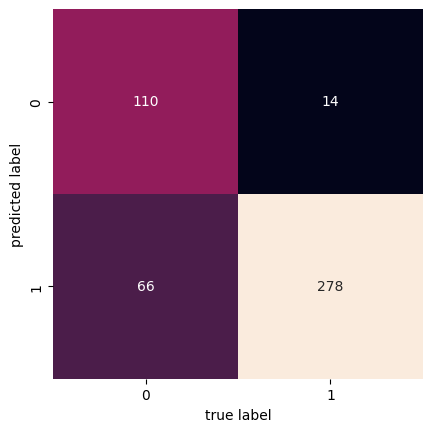

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       176
           1       0.81      0.95      0.87       292

    accuracy                           0.83       468
   macro avg       0.85      0.79      0.80       468
weighted avg       0.84      0.83      0.82       468

Metriche set di test: seed 42 e set di test 20% del totale

Accuracy:
clf_model_21_2: 0.8589420654911839
clf_model_22_2: 0.8589743589743589

Precision:
clf_model_21_2: 0.7857142857142857
clf_model_22_2: 0.8855218855218855

Recall:
clf_model_21_2: 0.8301886792452831
clf_model_22_2: 0.8915254237288136

F1:
clf_model_21_2: 0.8073394495412844
clf_model_22_2: 0.8885135135135136

Matrice di confusione per svm_21:


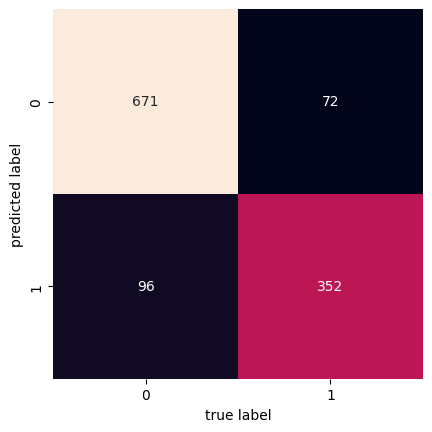

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       767
           1       0.79      0.83      0.81       424

    accuracy                           0.86      1191
   macro avg       0.84      0.85      0.85      1191
weighted avg       0.86      0.86      0.86      1191


Matrice di confusione per svm_22:


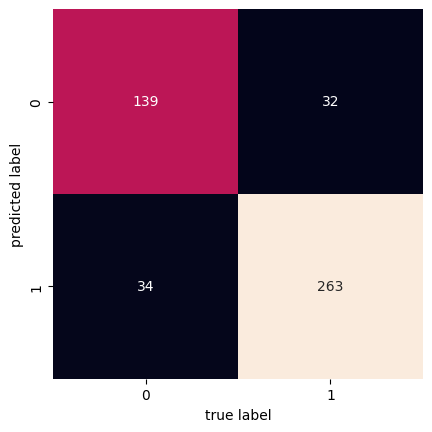

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       173
           1       0.89      0.89      0.89       295

    accuracy                           0.86       468
   macro avg       0.85      0.85      0.85       468
weighted avg       0.86      0.86      0.86       468



In [121]:
clf_model_21_2 = SGDClassifier(loss='hinge')
clf_model_22_2 = SGDClassifier(loss='hinge')

eva_SDG_21_2, eva_SDG_22_2 = training(clf_model_21_2, clf_model_22_2, X_koi_data, y_koi_data, X_koi_data_sg_t, y_koi_data_sg_t, "clf_model_21_2", "clf_model_22_2", 1)

Utilizzo della "bipolar labeling convention" 

Metriche set di test: seed 8 e set di test 20% del totale

Accuracy:
clf_model_21_3: 0.8606213266162889
clf_model_22_3: 0.8632478632478633

Precision:
clf_model_21_3: 0.7967479674796748
clf_model_22_3: 0.8972602739726028

Recall:
clf_model_21_3: 0.7636363636363637
clf_model_22_3: 0.8851351351351351

F1:
clf_model_21_3: 0.779840848806366
clf_model_22_3: 0.891156462585034

Matrice di confusione per svm_21:


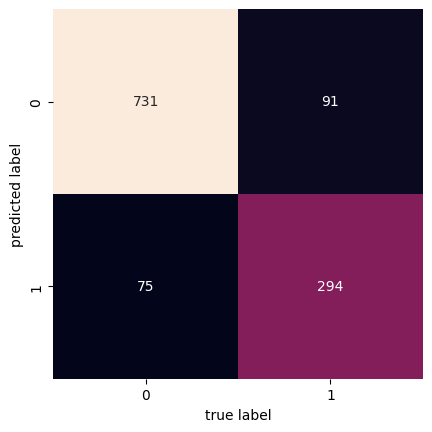

              precision    recall  f1-score   support

          -1       0.89      0.91      0.90       806
           1       0.80      0.76      0.78       385

    accuracy                           0.86      1191
   macro avg       0.84      0.84      0.84      1191
weighted avg       0.86      0.86      0.86      1191


Matrice di confusione per svm_22:


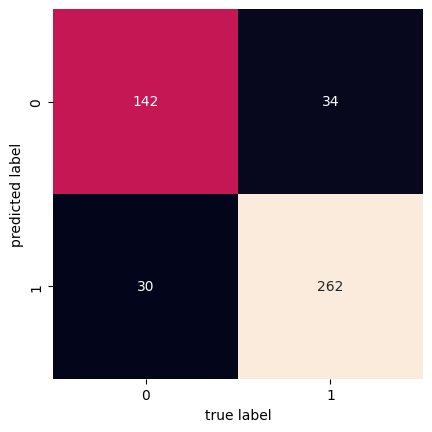

              precision    recall  f1-score   support

          -1       0.81      0.83      0.82       172
           1       0.90      0.89      0.89       296

    accuracy                           0.86       468
   macro avg       0.85      0.86      0.85       468
weighted avg       0.86      0.86      0.86       468

Metriche set di test: seed 15 e set di test 20% del totale

Accuracy:
clf_model_21_3: 0.8631402183039463
clf_model_22_3: 0.8354700854700855

Precision:
clf_model_21_3: 0.8299120234604106
clf_model_22_3: 0.8874172185430463

Recall:
clf_model_21_3: 0.729381443298969
clf_model_22_3: 0.8617363344051447

F1:
clf_model_21_3: 0.7764060356652949
clf_model_22_3: 0.8743882544861338

Matrice di confusione per svm_21:


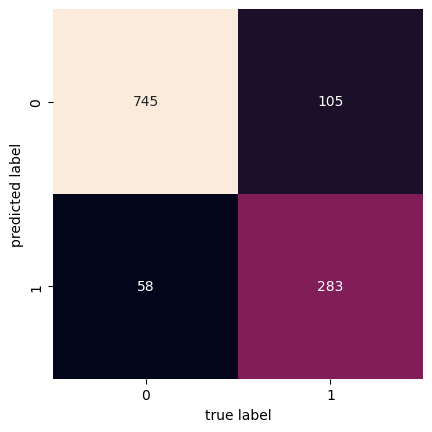

              precision    recall  f1-score   support

          -1       0.88      0.93      0.90       803
           1       0.83      0.73      0.78       388

    accuracy                           0.86      1191
   macro avg       0.85      0.83      0.84      1191
weighted avg       0.86      0.86      0.86      1191


Matrice di confusione per svm_22:


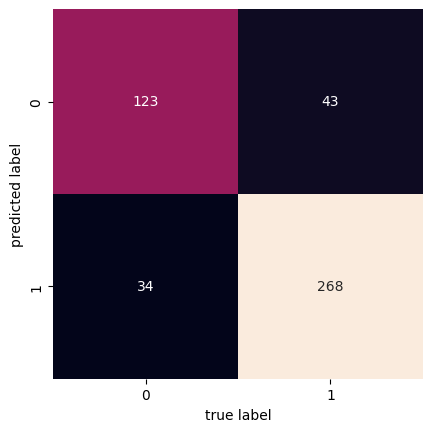

              precision    recall  f1-score   support

          -1       0.74      0.78      0.76       157
           1       0.89      0.86      0.87       311

    accuracy                           0.84       468
   macro avg       0.81      0.82      0.82       468
weighted avg       0.84      0.84      0.84       468

Metriche set di test: seed 23 e set di test 20% del totale

Accuracy:
clf_model_21_3: 0.8841309823677582
clf_model_22_3: 0.8760683760683761

Precision:
clf_model_21_3: 0.8467966573816156
clf_model_22_3: 0.8644578313253012

Recall:
clf_model_21_3: 0.7855297157622739
clf_model_22_3: 0.9566666666666667

F1:
clf_model_21_3: 0.8150134048257373
clf_model_22_3: 0.9082278481012659

Matrice di confusione per svm_21:


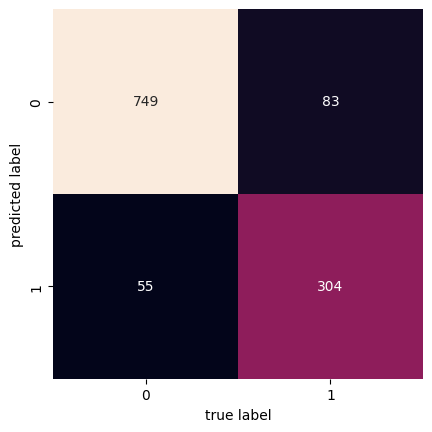

              precision    recall  f1-score   support

          -1       0.90      0.93      0.92       804
           1       0.85      0.79      0.82       387

    accuracy                           0.88      1191
   macro avg       0.87      0.86      0.87      1191
weighted avg       0.88      0.88      0.88      1191


Matrice di confusione per svm_22:


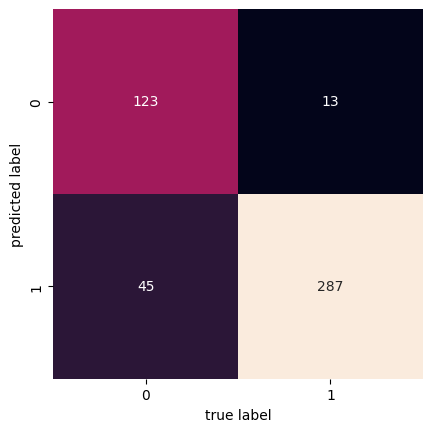

              precision    recall  f1-score   support

          -1       0.90      0.73      0.81       168
           1       0.86      0.96      0.91       300

    accuracy                           0.88       468
   macro avg       0.88      0.84      0.86       468
weighted avg       0.88      0.88      0.87       468

Metriche set di test: seed 31 e set di test 20% del totale

Accuracy:
clf_model_21_3: 0.8530646515533166
clf_model_22_3: 0.8418803418803419

Precision:
clf_model_21_3: 0.8123167155425219
clf_model_22_3: 0.8263473053892215

Recall:
clf_model_21_3: 0.7139175257731959
clf_model_22_3: 0.9452054794520548

F1:
clf_model_21_3: 0.7599451303155007
clf_model_22_3: 0.8817891373801918

Matrice di confusione per svm_21:


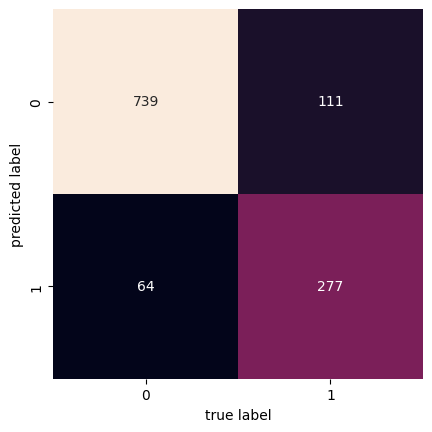

              precision    recall  f1-score   support

          -1       0.87      0.92      0.89       803
           1       0.81      0.71      0.76       388

    accuracy                           0.85      1191
   macro avg       0.84      0.82      0.83      1191
weighted avg       0.85      0.85      0.85      1191


Matrice di confusione per svm_22:


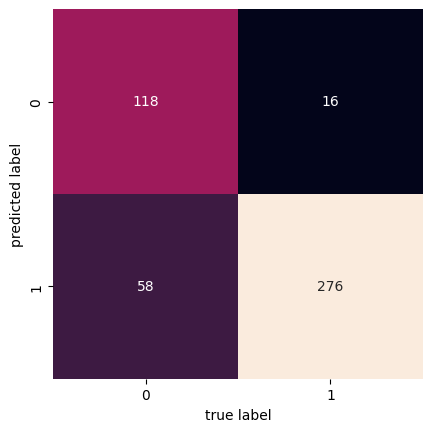

              precision    recall  f1-score   support

          -1       0.88      0.67      0.76       176
           1       0.83      0.95      0.88       292

    accuracy                           0.84       468
   macro avg       0.85      0.81      0.82       468
weighted avg       0.85      0.84      0.84       468

Metriche set di test: seed 42 e set di test 20% del totale

Accuracy:
clf_model_21_3: 0.8706968933669186
clf_model_22_3: 0.8547008547008547

Precision:
clf_model_21_3: 0.8013392857142857
clf_model_22_3: 0.8821548821548821

Recall:
clf_model_21_3: 0.8466981132075472
clf_model_22_3: 0.888135593220339

F1:
clf_model_21_3: 0.823394495412844
clf_model_22_3: 0.8851351351351352

Matrice di confusione per svm_21:


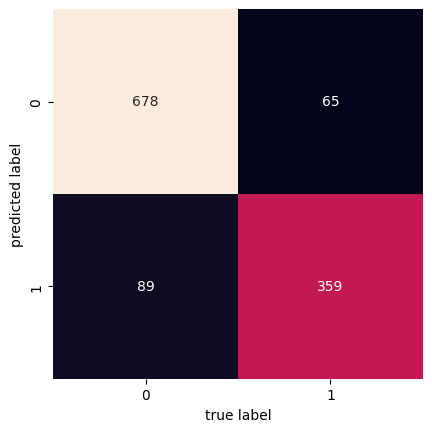

              precision    recall  f1-score   support

          -1       0.91      0.88      0.90       767
           1       0.80      0.85      0.82       424

    accuracy                           0.87      1191
   macro avg       0.86      0.87      0.86      1191
weighted avg       0.87      0.87      0.87      1191


Matrice di confusione per svm_22:


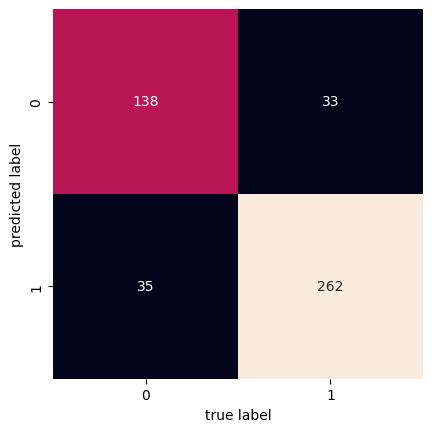

              precision    recall  f1-score   support

          -1       0.81      0.80      0.80       173
           1       0.88      0.89      0.89       295

    accuracy                           0.85       468
   macro avg       0.84      0.84      0.84       468
weighted avg       0.85      0.85      0.85       468



In [125]:
clf_model_21_3 = SGDClassifier(loss='hinge')
clf_model_22_3 = SGDClassifier(loss='hinge')

y_koi_data_b = y_koi_data.replace(0, -1)
y_koi_data_sg_t_b = y_koi_data_sg_t.replace(0, -1)

eva_SDG_21_3, eva_SDG_22_3 = training(clf_model_21_3, clf_model_22_3, X_koi_data, y_koi_data_b, X_koi_data_sg_t, y_koi_data_sg_t_b, "clf_model_21_3", "clf_model_22_3", 1)

Prove con bilanciamento del dataset in under-sampling ed oversampling

In [ ]:
# Oversampling del dataset tramite SMOTE
smote = SMOTE()
X_koi_data_over, y_koi_data_over = smote.fit_resample(X_koi_data, y_koi_data_b)
X_koi_data_sg_t_over, y_koi_data_sg_t_over = smote.fit_resample(X_koi_data_sg_t, y_koi_data_sg_t_b)

clf_model_21_4 = SGDClassifier(loss='hinge')
clf_model_22_4 = SGDClassifier(loss='hinge')

eva_SDG_21_4, eva_SDG_22_4 = training(clf_model_21_4, clf_model_22_4, X_koi_data_over, y_koi_data_over, X_koi_data_sg_t_over, y_koi_data_sg_t_over, "clf_model_21_4", "clf_model_22_4", 1)

# Undersampling del dataset tramite RandomUnderSampler
rus = RandomUnderSampler()

X_koi_data_under, y_koi_data_under = rus.fit_resample(X_koi_data, y_koi_data_b)
X_koi_data_sg_t_under, y_koi_data_sg_t_under = rus.fit_resample(X_koi_data_sg_t, y_koi_data_sg_t_b)

clf_model_21_5 = SGDClassifier(loss='hinge')
clf_model_22_5 = SGDClassifier(loss='hinge')

eva_SDG_21_5, eva_SDG_22_5 = training(clf_model_21_5, clf_model_22_5, X_koi_data_under, y_koi_data_under, X_koi_data_sg_t_under, y_koi_data_sg_t_under, "clf_model_21_5", "clf_model_22_5", 1)



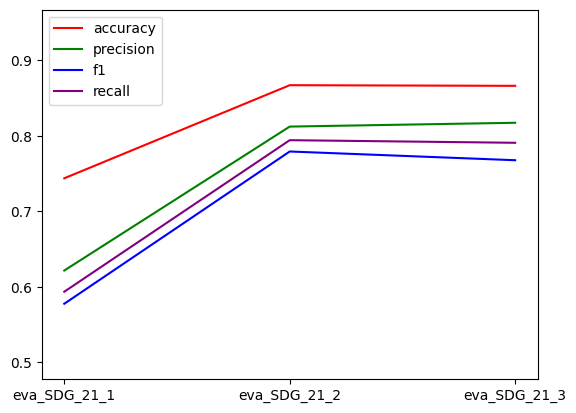

In [126]:
# Mostra il grafico
plotter([eva_SDG_21_1, eva_SDG_21_2, eva_SDG_21_3, eva_SDG_21_4, eva_SDG_21_5], ['eva_SDG_21_1', 'eva_SDG_21_2', 'eva_SDG_21_3', 'eva_SDG_21_4', 'eva_SDG_21_5'])

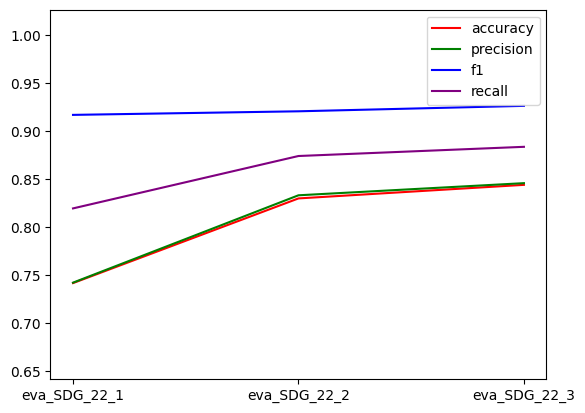

In [124]:
plotter([eva_SDG_22_1, eva_SDG_22_2, eva_SDG_22_3, eva_SDG_22_4, eva_SDG_22_5], ['eva_SDG_22_1', 'eva_SDG_22_2', 'eva_SDG_22_3', 'eva_SDG_22_4', 'eva_SDG_22_5'])